<a href="https://colab.research.google.com/github/OlhaDot/NewProjectStadyAcademy/blob/master/ST_many_var_testing%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from datetime import datetime


In [35]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_history_startY.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       Date   GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20071231   8.2           6.4     12.8          6.9          5.1   
1  20081231   2.2           6.4     25.3          7.7          5.3   
2  20091231 -15.1           8.8     16.0         10.9          7.8   
3  20101231   4.1           8.1      9.4         10.5          7.9   
4  20111231   5.5           7.9      8.0         11.1          8.0   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop        DR  
0           8.0          7.4          5.1  0.124380  
1          12.0         10.9          7.7  0.153751  
2          10.3         11.4          8.0  0.279171  
3           7.8         10.6          8.0  0.110035  
4           7.8         10.3          8.0  0.052725  


In [36]:
data.describe()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.015123e+07,-1.388235,9.347059,13.305882,21.405882,18.364706,12.405882,22.605882,19.382353,0.115115
std,5.049752e+04,9.331860,2.938987,11.165319,11.188022,10.838700,5.462196,11.758692,11.271160,0.072944
min,2.007123e+07,-29.100000,6.400000,-0.300000,6.900000,5.100000,6.000000,7.400000,5.100000,0.041713
25%,2.011123e+07,-3.800000,7.900000,8.000000,10.600000,8.000000,7.800000,10.900000,8.000000,0.052725
50%,2.015123e+07,2.400000,8.800000,12.100000,24.200000,21.800000,12.000000,26.200000,23.700000,0.081292
75%,2.019123e+07,3.500000,9.500000,14.900000,30.800000,27.000000,14.500000,31.700000,27.700000,0.153751
max,2.023123e+07,8.200000,18.000000,48.500000,39.600000,36.600000,25.000000,42.200000,38.000000,0.279171


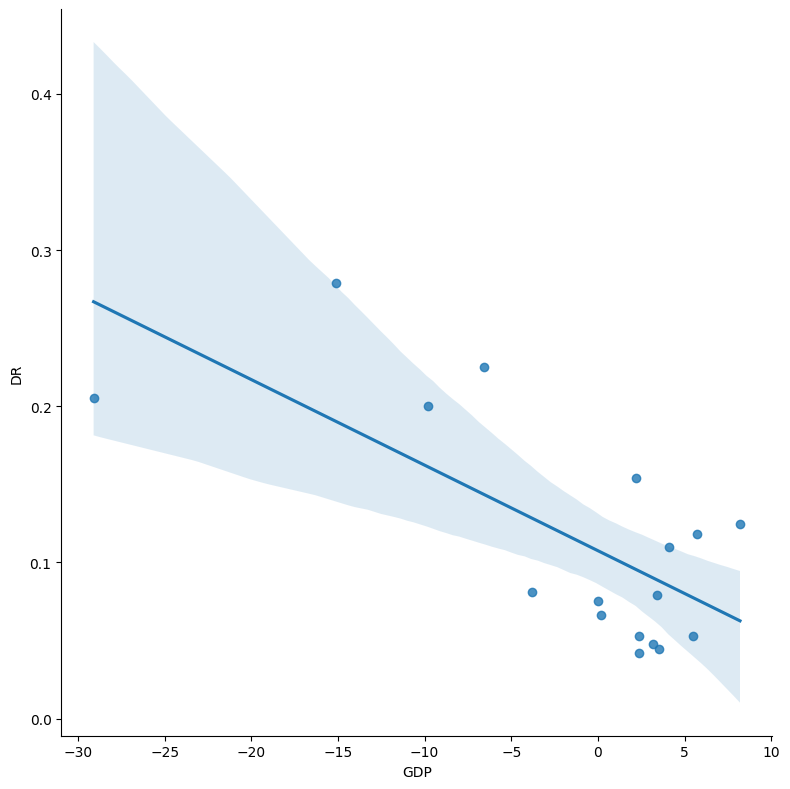

In [ ]:
sns.lmplot(x='GDP', y='DR', data=data, height=8)
plt.show()

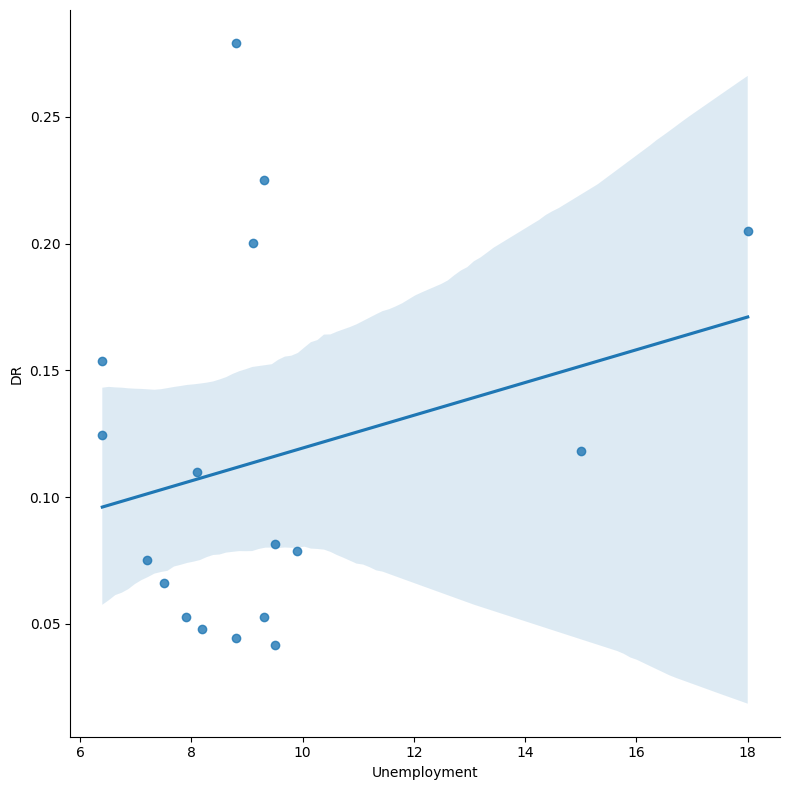

In [ ]:
sns.lmplot(x='Unemployment', y='DR', data=data, height=8)
plt.show()

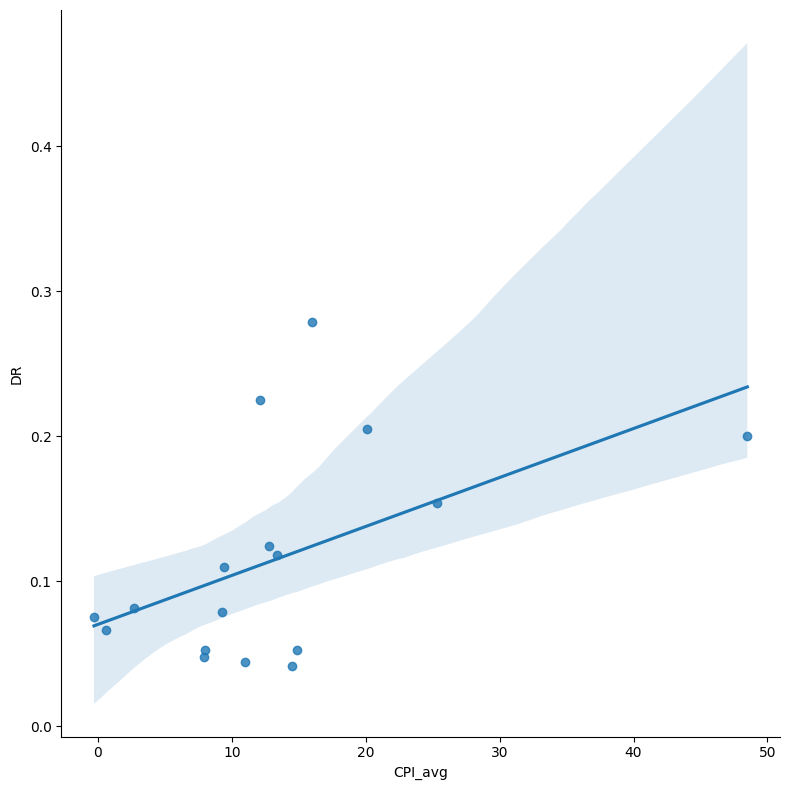

In [ ]:
sns.lmplot(x='CPI_avg', y='DR', data=data, height=8)
plt.show()

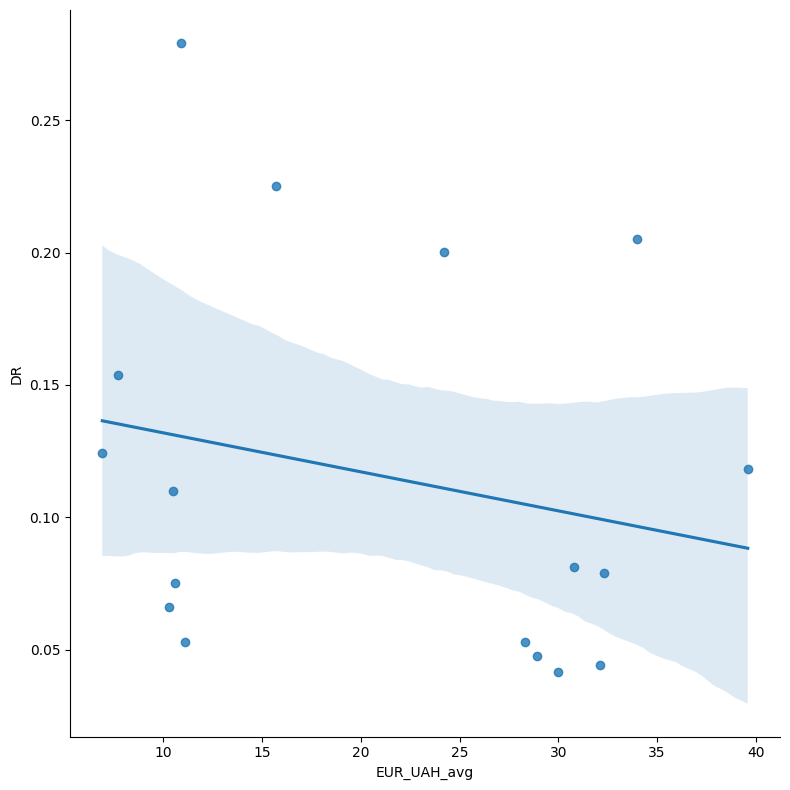

In [ ]:
sns.lmplot(x='EUR_UAH_avg', y='DR', data=data, height=8)
plt.show()

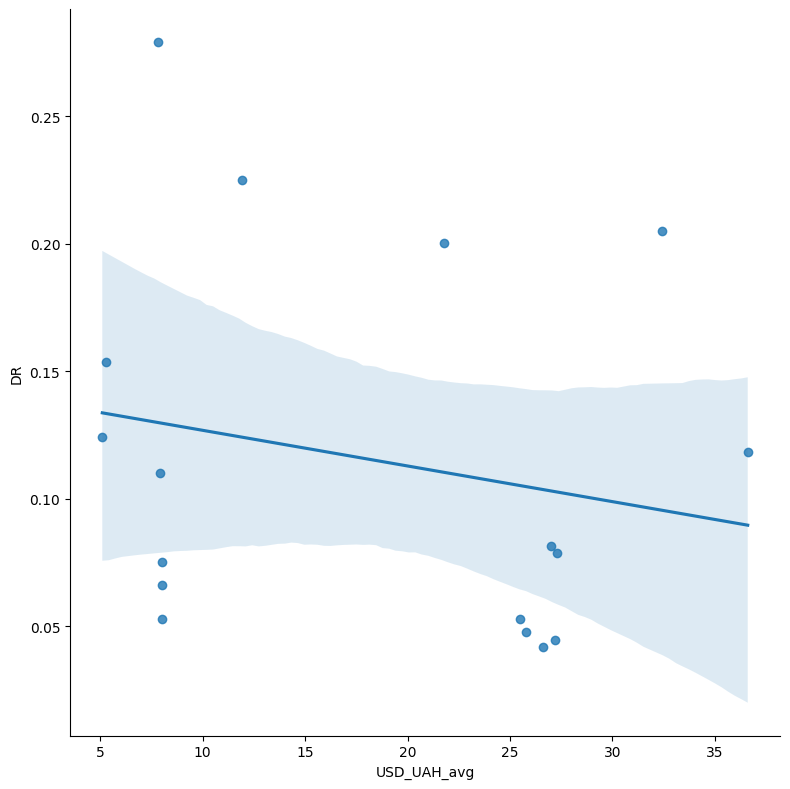

In [ ]:
sns.lmplot(x='USD_UAH_avg', y='DR', data=data, height=8)
plt.show()

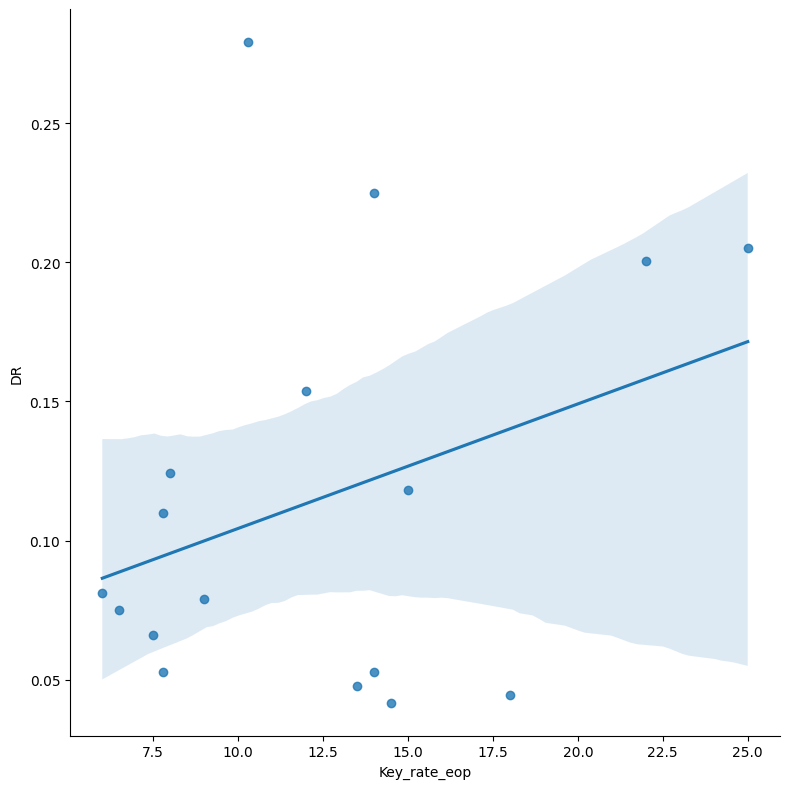

In [ ]:
sns.lmplot(x='Key_rate_eop', y='DR', data=data, height=8)
plt.show()

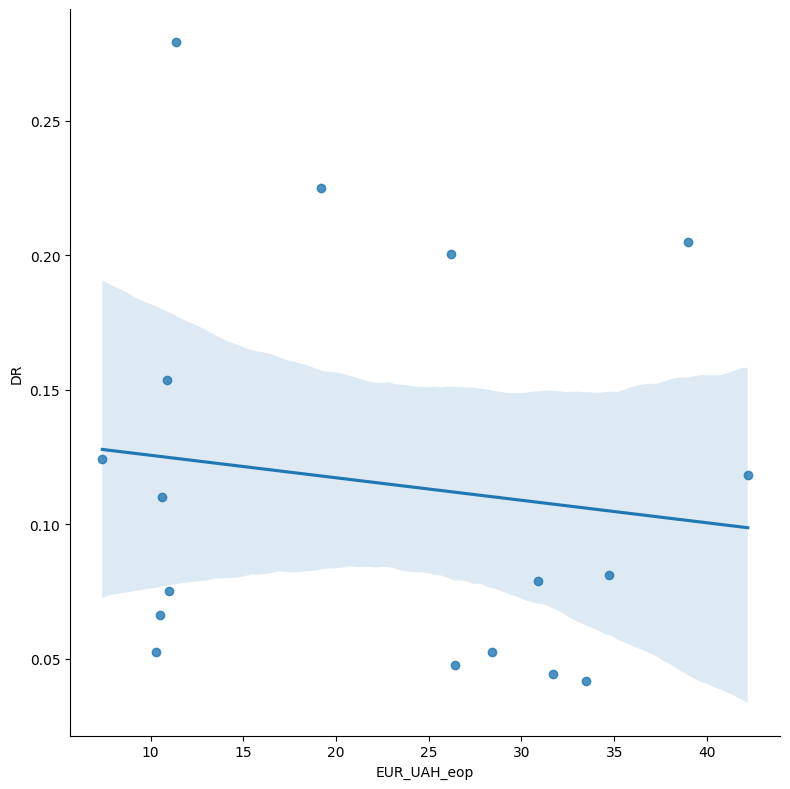

In [ ]:
sns.lmplot(x='EUR_UAH_eop', y='DR', data=data, height=8)
plt.show()

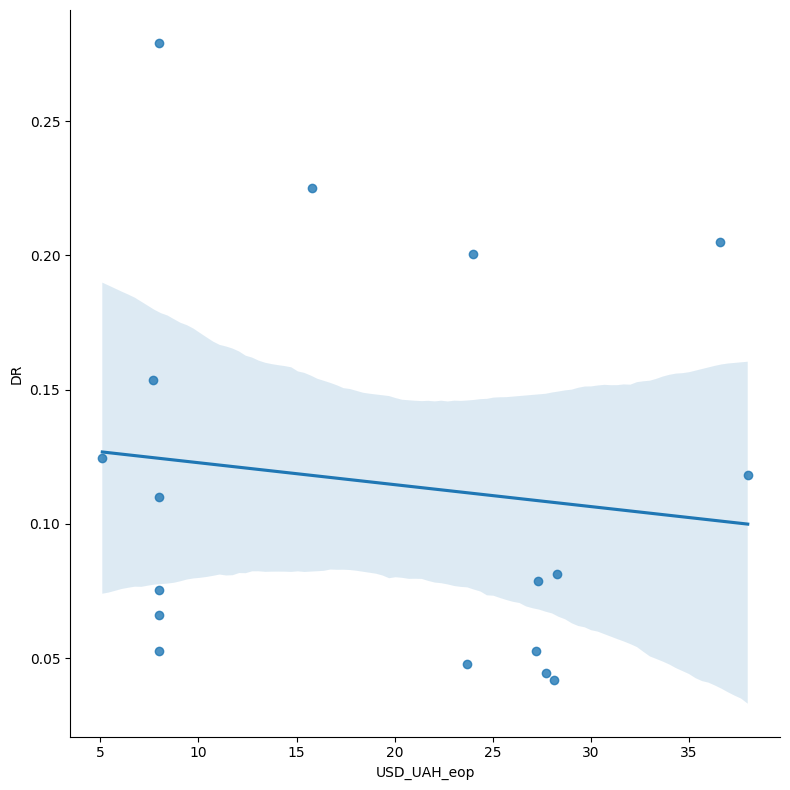

In [ ]:
sns.lmplot(x='USD_UAH_eop', y='DR', data=data, height=8)
plt.show()

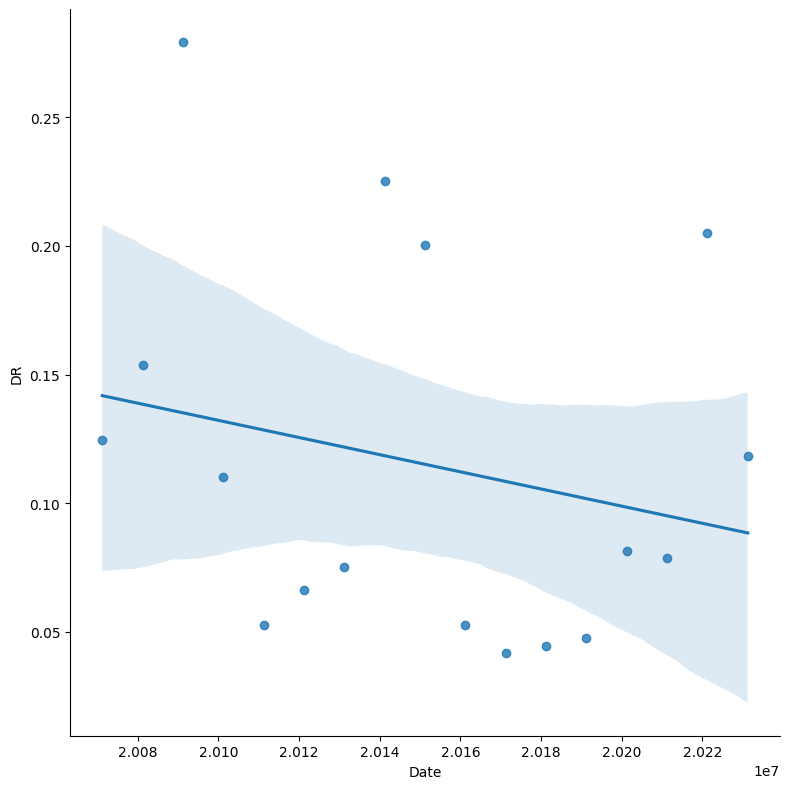

In [ ]:
sns.lmplot(x='Date', y='DR', data=data, height=8)
plt.show()

In [ ]:
# ==> the best result - CPI_avg

In [ ]:
data.corr()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
Date,1.000000,-0.203057,0.729812,-0.046668,0.955365,0.952126,0.454315,0.941839,0.940302,-0.230794
GDP,-0.203057,1.000000,-0.585000,-0.355284,-0.147659,-0.176901,-0.566447,-0.234906,-0.251570,-0.700942
Unemployment,0.729812,-0.585000,1.000000,0.160590,0.696679,0.727183,0.637505,0.752155,0.772310,0.260543
CPI_avg,-0.046668,-0.355284,0.160590,1.000000,0.102747,0.128682,0.682684,0.154291,0.188922,0.517276
EUR_UAH_avg,0.955365,-0.147659,0.696679,0.102747,1.000000,0.996890,0.542914,0.984382,0.984715,-0.225822
USD_UAH_avg,0.952126,-0.176901,0.727183,0.128682,0.996890,1.000000,0.571279,0.986622,0.990701,-0.207918
Key_rate_eop,0.454315,-0.566447,0.637505,0.682684,0.542914,0.571279,1.000000,0.586735,0.630593,0.335139
EUR_UAH_eop,0.941839,-0.234906,0.752155,0.154291,0.984382,0.986622,0.586735,1.000000,0.994919,-0.134750
USD_UAH_eop,0.940302,-0.251570,0.772310,0.188922,0.984715,0.990701,0.630593,0.994919,1.000000,-0.126245
DR,-0.230794,-0.700942,0.260543,0.517276,-0.225822,-0.207918,0.335139,-0.134750,-0.126245,1.000000


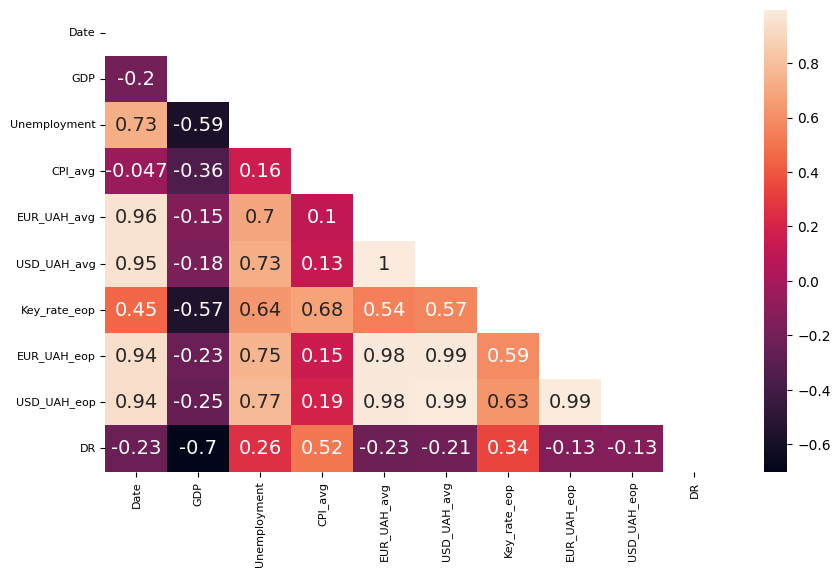

In [ ]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [39]:
X_arrey = data.iloc[:, :9]

In [40]:
X_arrey

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop
0,20071231,8.2,6.4,12.8,6.9,5.1,8.0,7.4,5.1
1,20081231,2.2,6.4,25.3,7.7,5.3,12.0,10.9,7.7
2,20091231,-15.1,8.8,16.0,10.9,7.8,10.3,11.4,8.0
3,20101231,4.1,8.1,9.4,10.5,7.9,7.8,10.6,8.0
4,20111231,5.5,7.9,8.0,11.1,8.0,7.8,10.3,8.0
5,20121231,0.2,7.5,0.6,10.3,8.0,7.5,10.5,8.0
6,20131231,0.0,7.2,-0.3,10.6,8.0,6.5,11.0,8.0
7,20141231,-6.6,9.3,12.1,15.7,11.9,14.0,19.2,15.8
8,20151231,-9.8,9.1,48.5,24.2,21.8,22.0,26.2,24.0
9,20161231,2.4,9.3,14.9,28.3,25.5,14.0,28.4,27.2


In [32]:
Y = np.array(data.DR)

In [41]:
LinReg = LinearRegression()

In [42]:
LinReg.fit(X_arrey, Y)

LinearRegression()

In [43]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [44]:
Y_PRED = LinReg.predict(X_arrey)
print("predicted values according to model:",  Y_PRED)

predicted values according to model: [0.09407038 0.15951274 0.24774187 0.12416882 0.11531626 0.07878065
 0.07900021 0.16762427 0.20713096 0.05140522 0.07790896 0.0589211
 0.00910466 0.08586936 0.09110828 0.23124349 0.07804574]


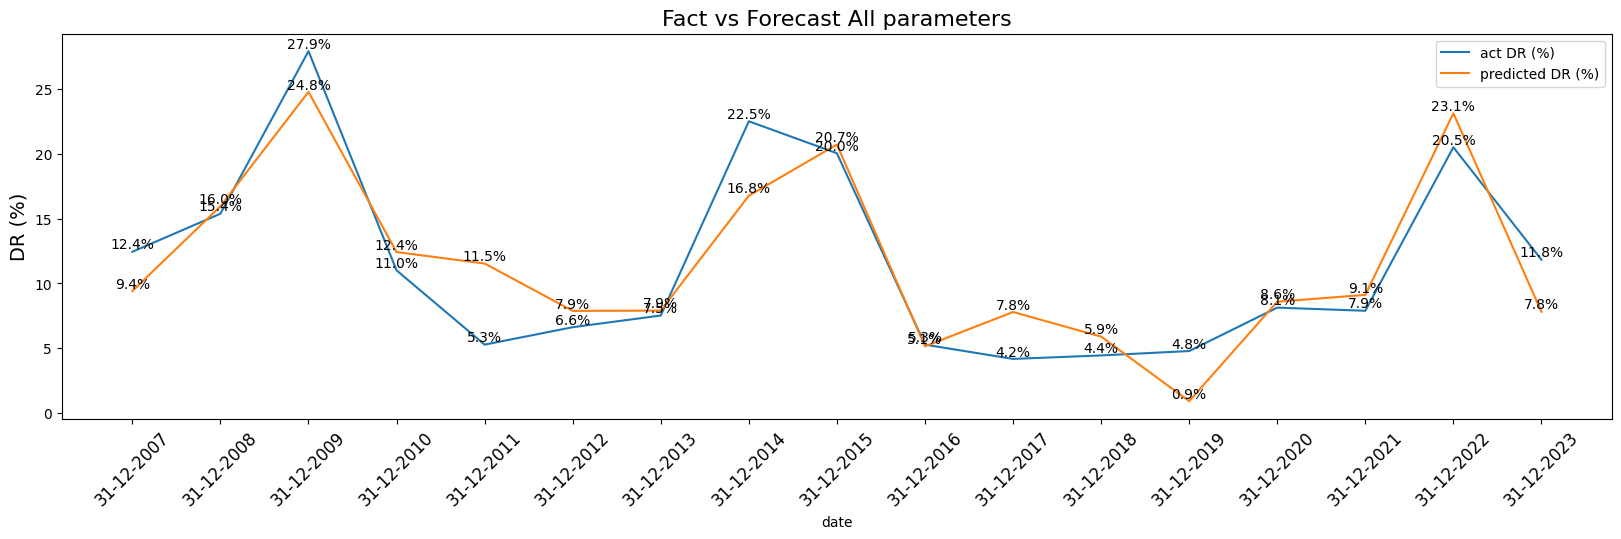

In [64]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y[i] * 100, '{:.1f}%'.format(Y[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED[i] * 100, '{:.1f}%'.format(Y_PRED[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast All parameters', fontsize=16)

plt.legend()

plt.show()

In [46]:
print('Coefficient of determination/ Level of confidance:', round(LinReg.score(X_arrey, Y),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED)))

Coefficient of determination/ Level of confidance: 0.82
Mean Absolute Error: 0.02345620320157232
Mean Squared Error: 0.0008863715692333605
Root Mean Squared Error: 0.029771993034282414


**FORECAST**

In [47]:
url_f = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_FCST_Y.csv'
date_forecast = pd.read_csv(url_f, sep=';')
print(date_forecast.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20241231    5            12        7           43           39   
1  20251231    7             9        9           48           42   
2  20261231    6             8        7           51           43   
3  20241231   -8            20       20           46           41   
4  20251231   -5            18       17           59           52   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
0            13           47           41  base   
1            10           49           43  base   
2             8           51           44  base   
3            25           55           48  worst  
4            25           64           55  worst  


In [48]:
X_new_base = date_forecast.loc[date_forecast['FCST'].str.strip() == 'base']
print(X_new_base)

       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20241231    5            12        7           43           39   
1  20251231    7             9        9           48           42   
2  20261231    6             8        7           51           43   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
0            13           47           41  base   
1            10           49           43  base   
2             8           51           44  base   


In [49]:
X_new_base = X_new_base.drop(columns=['FCST'])

In [50]:
Y_PRED_NEW = LinReg.predict(X_new_base)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW)

predicted new values of DR in base scenario : [0.02634538 0.0148475  0.04364275]


In [ ]:
X_new_worst = date_forecast.loc[date_forecast['FCST'].str.strip() == 'worst', 'CPI_avg']
print(X_new_worst)

3    20
4    17
5    14
Name: CPI_avg, dtype: int64


In [ ]:
Y_PRED_NEW = LinReg.predict(X_new_worst.values.reshape(-1, 1))
print("predicted new values of DR in worst scenario :",  Y_PRED_NEW)

predicted new values of DR in worst scenario : [0.1377371  0.12759885 0.11746059]


**VARIANT WO SOME VARIABLES**

wo GDP

In [68]:
data = pd.read_csv(url, sep=';')

In [70]:
X_arrey_wo_GPT = data.iloc[:, :9].drop(columns=['GDP'])

In [71]:
X_arrey_wo_GPT

,Date,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop
0,20071231,6.4,12.8,6.9,5.1,8.0,7.4,5.1
1,20081231,6.4,25.3,7.7,5.3,12.0,10.9,7.7
2,20091231,8.8,16.0,10.9,7.8,10.3,11.4,8.0
3,20101231,8.1,9.4,10.5,7.9,7.8,10.6,8.0
4,20111231,7.9,8.0,11.1,8.0,7.8,10.3,8.0
5,20121231,7.5,0.6,10.3,8.0,7.5,10.5,8.0
6,20131231,7.2,-0.3,10.6,8.0,6.5,11.0,8.0
7,20141231,9.3,12.1,15.7,11.9,14.0,19.2,15.8
8,20151231,9.1,48.5,24.2,21.8,22.0,26.2,24.0
9,20161231,9.3,14.9,28.3,25.5,14.0,28.4,27.2


In [72]:
Y_wo_GDP = np.array(data.DR)
LinReg_wo_GDP = LinearRegression()
LinReg_wo_GDP.fit(X_arrey_wo_GPT, Y_wo_GDP)


LinearRegression()

In [73]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [74]:
Y_PRED_wo_GDP = LinReg_wo_GDP.predict(X_arrey_wo_GPT)
print("predicted values according to model:",  Y_PRED_wo_GDP)

predicted values according to model: [0.10622404 0.17779364 0.20155366 0.13565302 0.13217244 0.07685675
 0.0783218  0.17666903 0.20228217 0.03025424 0.08656185 0.06755618
 0.00368283 0.05555344 0.08908175 0.21262448 0.12411166]


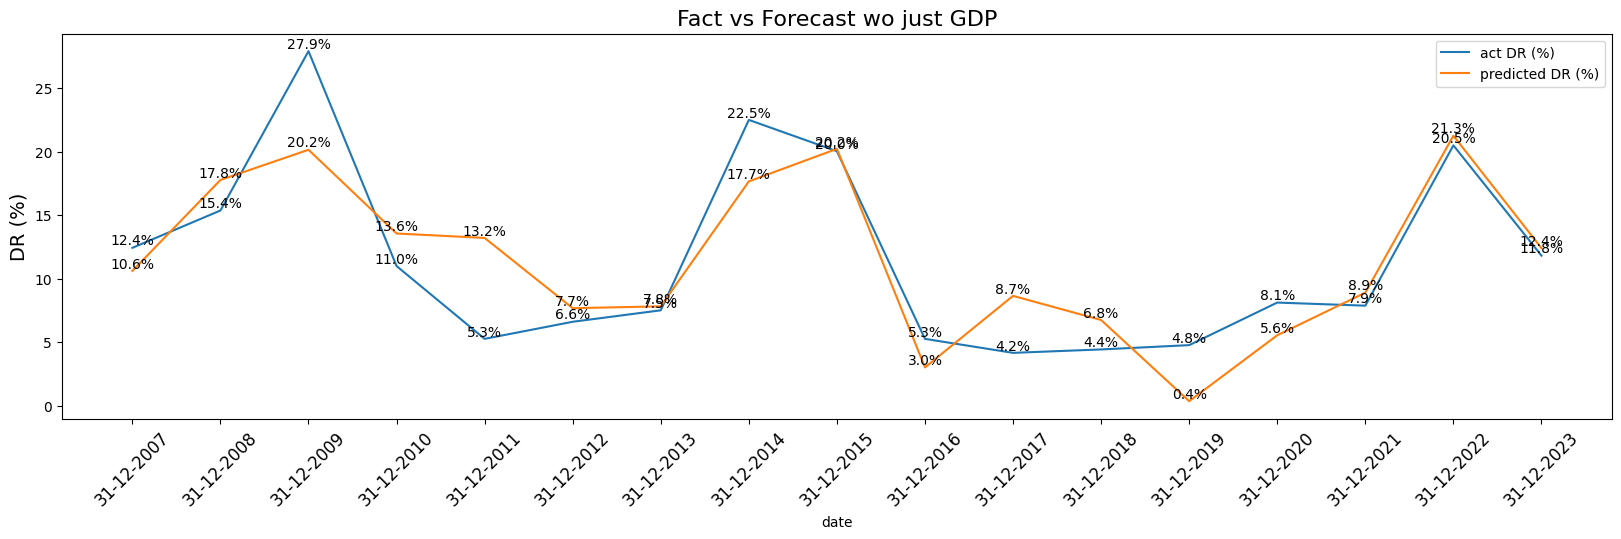

In [75]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_GDP * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_GDP * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_GDP[i] * 100, '{:.1f}%'.format(Y_wo_GDP[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_GDP[i] * 100, '{:.1f}%'.format(Y_PRED_wo_GDP[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just GDP', fontsize=16)

plt.legend()

plt.show()

In [102]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_GDP.score(X_arrey_wo_GPT, Y_PRED_wo_GDP),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_GDP))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_GDP))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_GDP)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.027821768503426686
Mean Squared Error: 0.001307480196240797
Root Mean Squared Error: 0.03615909562255114


In [76]:
# Forecast
X_new_base_wo_GDP = X_new_base.drop(columns=['GDP'])
X_new_base_wo_GDP




,Date,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop
0,20241231,12,7,43,39,13,47,41
1,20251231,9,9,48,42,10,49,43
2,20261231,8,7,51,43,8,51,44


In [78]:
Y_PRED_NEW_wo_GDP = LinReg_wo_GDP.predict(X_new_base_wo_GDP)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_GDP)

predicted new values of DR in base scenario : [ 0.03883009 -0.01248425 -0.00133685]


In [ ]:
# wo Unemployment

In [79]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_Unemployment = data.iloc[:, :9].drop(columns=['Unemployment'])


In [80]:
Y_wo_Unemployment = np.array(data.DR)
LinReg_wo_Unemployment = LinearRegression()
LinReg_wo_Unemployment.fit(X_arrey_wo_Unemployment, Y_wo_Unemployment)

LinearRegression()

In [81]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [83]:
Y_PRED_wo_Unemployment = LinReg_wo_Unemployment.predict(X_arrey_wo_Unemployment)
print("predicted values according to model:",  Y_PRED_wo_Unemployment)

predicted values according to model: [0.08950325 0.16469708 0.22614419 0.10169913 0.09125121 0.09160062
 0.09466856 0.17287933 0.22230348 0.08213581 0.08689121 0.06213855
 0.03151909 0.11230145 0.07606486 0.21946563 0.03168951]


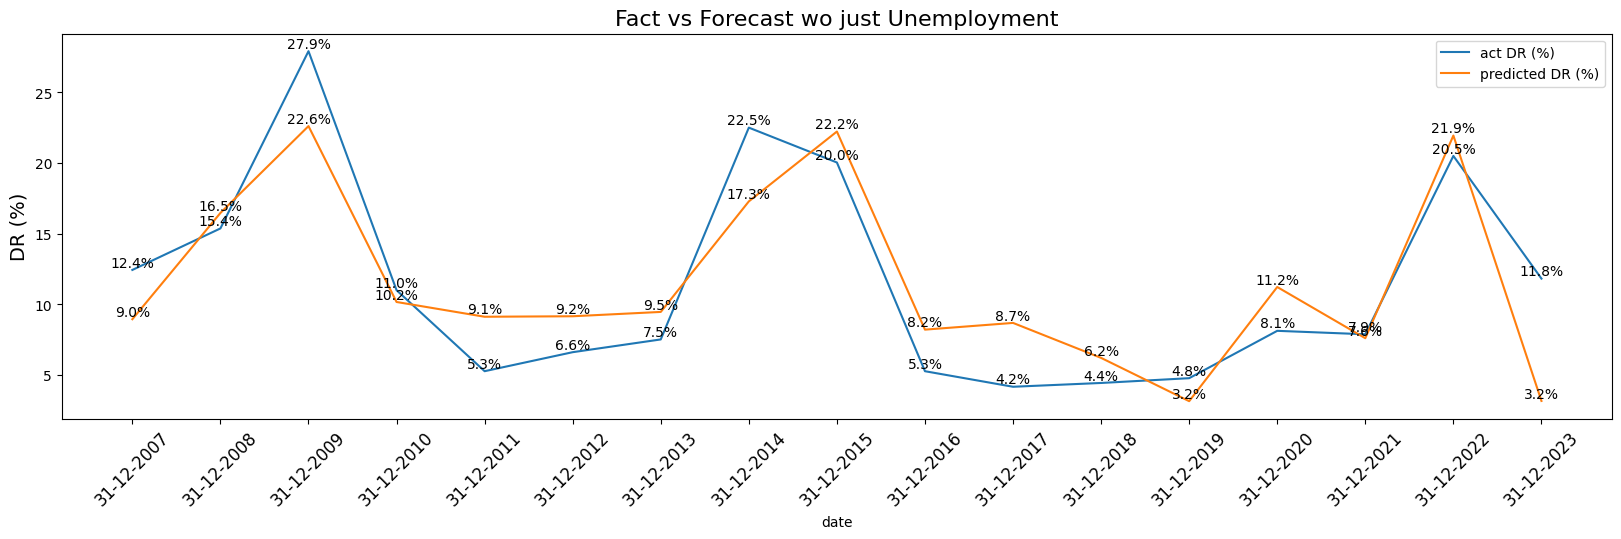

In [84]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_Unemployment * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_Unemployment * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_Unemployment[i] * 100, '{:.1f}%'.format(Y_wo_Unemployment[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_Unemployment[i] * 100, '{:.1f}%'.format(Y_PRED_wo_Unemployment[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just Unemployment', fontsize=16)

plt.legend()

plt.show()

In [104]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_Unemployment.score(X_arrey_wo_Unemployment, Y_PRED_wo_Unemployment),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_Unemployment))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_Unemployment))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_Unemployment)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.02988585704332082
Mean Squared Error: 0.0012990930744942314
Root Mean Squared Error: 0.03604293376647122


In [85]:
# Forecast
X_new_base_wo_Unemployment = X_new_base.drop(columns=['Unemployment'])
X_new_base_wo_Unemployment

Y_PRED_NEW_wo_Unemployment = LinReg_wo_Unemployment.predict(X_new_base_wo_Unemployment)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_Unemployment)

predicted new values of DR in base scenario : [0.03602442 0.04607979 0.06953272]


In [ ]:
# wo CPI_avg

In [86]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_CPI_avg = data.iloc[:, :9].drop(columns=['CPI_avg'])


In [87]:
Y_wo_CPI_avg = np.array(data.DR)
LinReg_wo_CPI_avg = LinearRegression()
LinReg_wo_CPI_avg.fit(X_arrey_wo_CPI_avg, Y_wo_CPI_avg)

LinearRegression()

In [88]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [89]:
Y_PRED_wo_CPI_avg = LinReg_wo_CPI_avg.predict(X_arrey_wo_CPI_avg)
print("predicted values according to model:",  Y_PRED_wo_CPI_avg)

predicted values according to model: [0.10098469 0.14547354 0.24156945 0.11864235 0.10591489 0.09635113
 0.08757462 0.18027088 0.15055752 0.07655969 0.09457139 0.09440015
 0.01856907 0.0830308  0.05576514 0.24991877 0.05679887]


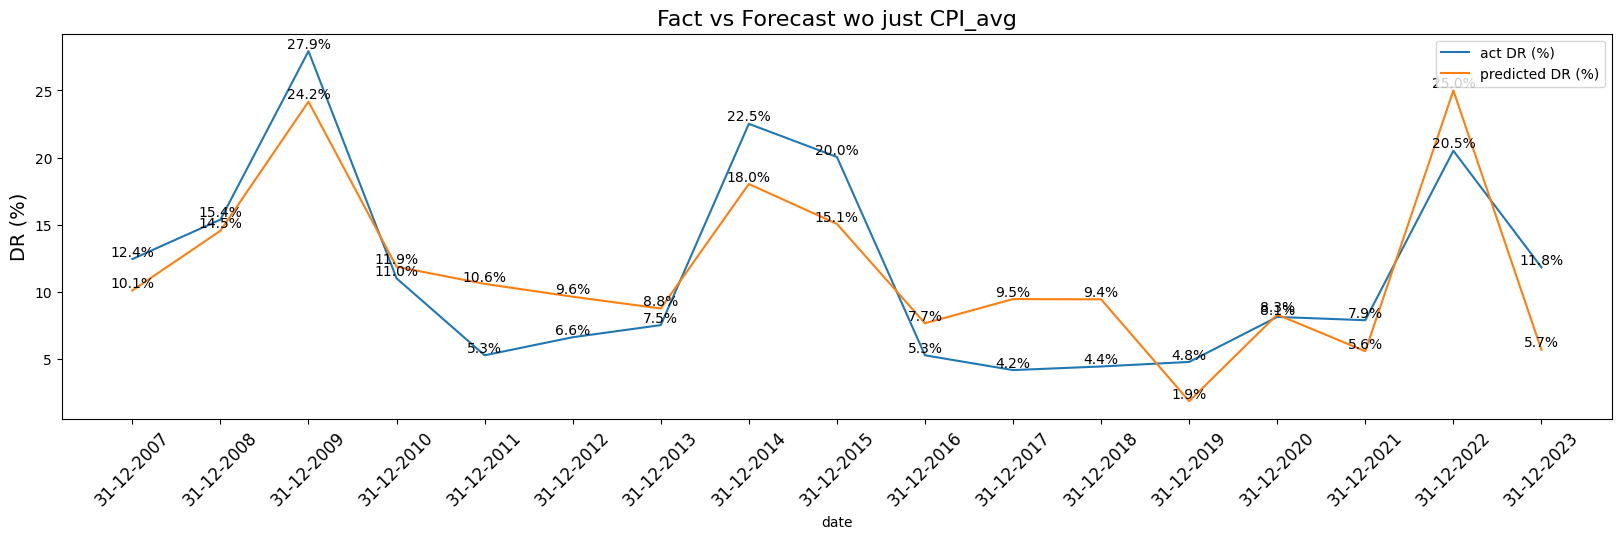

In [90]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_CPI_avg * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_CPI_avg * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_CPI_avg[i] * 100, '{:.1f}%'.format(Y_wo_CPI_avg[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_CPI_avg[i] * 100, '{:.1f}%'.format(Y_PRED_wo_CPI_avg[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just CPI_avg', fontsize=16)

plt.legend()

plt.show()

In [105]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_CPI_avg.score(X_arrey_wo_CPI_avg, Y_PRED_wo_CPI_avg),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_CPI_avg))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_CPI_avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_CPI_avg)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.03266583278023699
Mean Squared Error: 0.0013840643725945784
Root Mean Squared Error: 0.03720301563844762


In [91]:
# Forecast
X_new_base_wo_CPI_avg = X_new_base.drop(columns=['CPI_avg'])
X_new_base_wo_CPI_avg

Y_PRED_NEW_wo_CPI_avg = LinReg_wo_CPI_avg.predict(X_new_base_wo_CPI_avg)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_CPI_avg)

predicted new values of DR in base scenario : [0.0375354  0.01158605 0.03230053]


In [ ]:
# wo EUR_UAH_avg

In [92]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_EUR_UAH_avg = data.iloc[:, :9].drop(columns=['EUR_UAH_avg'])

In [93]:
Y_wo_EUR_UAH_avg = np.array(data.DR)
LinReg_wo_EUR_UAH_avg = LinearRegression()
LinReg_wo_EUR_UAH_avg.fit(X_arrey_wo_EUR_UAH_avg, Y_wo_EUR_UAH_avg)

LinearRegression()

In [95]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [96]:
Y_PRED_wo_EUR_UAH_avg = LinReg_wo_EUR_UAH_avg.predict(X_arrey_wo_EUR_UAH_avg)
print("predicted values according to model:",  Y_PRED_wo_EUR_UAH_avg)

predicted values according to model: [0.10567389 0.16692836 0.22445411 0.11991969 0.10323227 0.09359284
 0.09461539 0.15285655 0.21457061 0.04948215 0.08783422 0.03606071
 0.02439474 0.09871813 0.06258421 0.24048809 0.08154702]


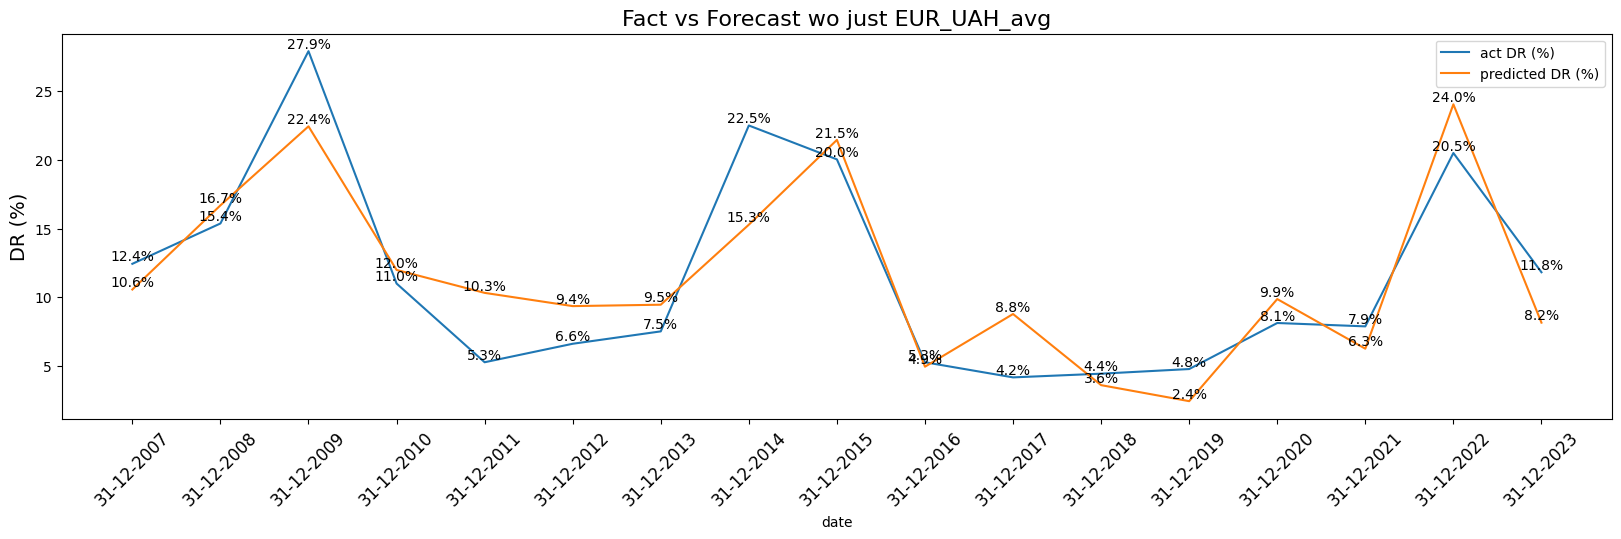

In [98]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_EUR_UAH_avg * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_EUR_UAH_avg * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_EUR_UAH_avg[i] * 100, '{:.1f}%'.format(Y_wo_EUR_UAH_avg[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_EUR_UAH_avg[i] * 100, '{:.1f}%'.format(Y_PRED_wo_EUR_UAH_avg[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just EUR_UAH_avg', fontsize=16)

plt.legend()

plt.show()

In [106]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_EUR_UAH_avg.score(X_arrey_wo_EUR_UAH_avg, Y_PRED_wo_EUR_UAH_avg),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_EUR_UAH_avg))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_EUR_UAH_avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_EUR_UAH_avg)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.027478164855878298
Mean Squared Error: 0.0010962378324058317
Root Mean Squared Error: 0.03310948251492058


In [100]:
# Forecast
X_new_base_wo_EUR_UAH_avg = X_new_base.drop(columns=['EUR_UAH_avg'])
X_new_base_wo_EUR_UAH_avg

Y_PRED_NEW_wo_EUR_UAH_avg = LinReg_wo_EUR_UAH_avg.predict(X_new_base_wo_EUR_UAH_avg)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_EUR_UAH_avg)

predicted new values of DR in base scenario : [ 0.03635883 -0.00650222 -0.01166768]


In [ ]:
# wo USD_UAH_avg

In [112]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_USD_UAH_avg = data.iloc[:, :9].drop(columns=['USD_UAH_avg'])



In [113]:
Y_wo_USD_UAH_avg = np.array(data.DR)
LinReg_wo_USD_UAH_avg = LinearRegression()
LinReg_wo_USD_UAH_avg.fit(X_arrey_wo_USD_UAH_avg, Y_wo_USD_UAH_avg)

LinearRegression()

In [114]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [115]:
Y_PRED_wo_USD_UAH_avg = LinReg_wo_USD_UAH_avg.predict(X_arrey_wo_USD_UAH_avg)
print("predicted values according to model:",  Y_PRED_wo_USD_UAH_avg)

predicted values according to model: [0.10749867 0.1572127  0.24384355 0.12384747 0.10573813 0.08958523
 0.08842581 0.13589171 0.21442082 0.04258583 0.08792074 0.0442369
 0.03513011 0.09293058 0.066276   0.23821594 0.08319276]


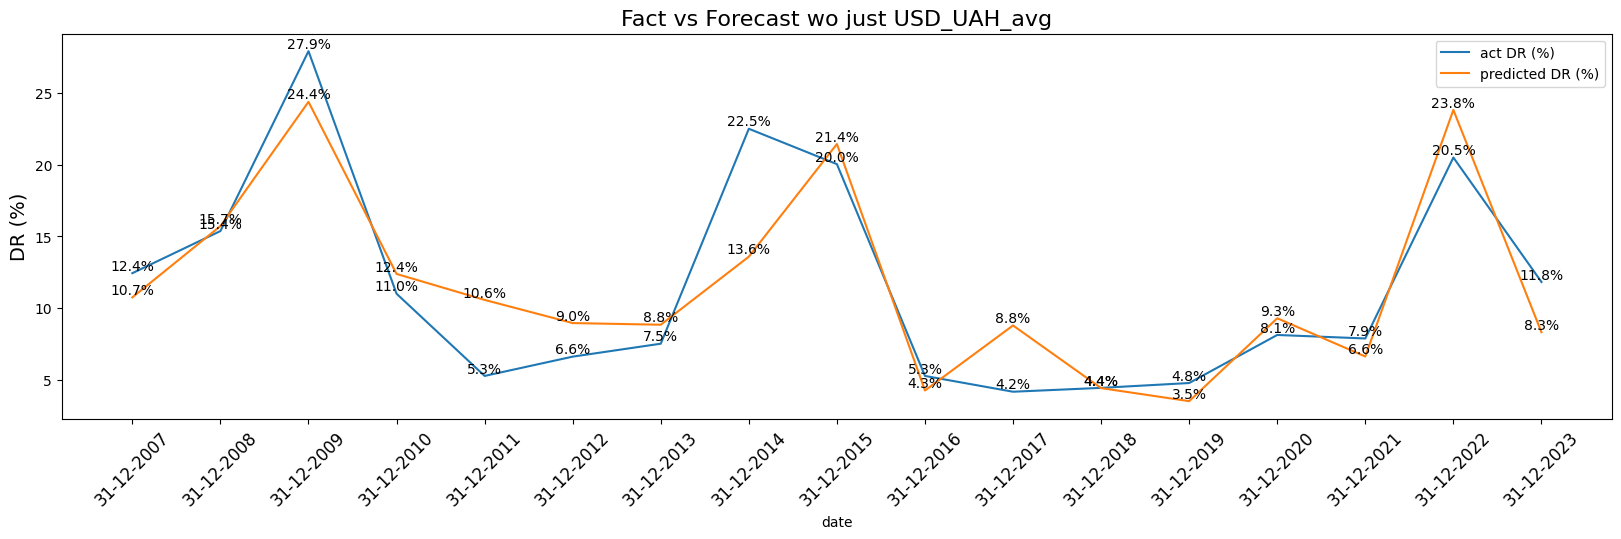

In [116]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_USD_UAH_avg * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_USD_UAH_avg * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_USD_UAH_avg[i] * 100, '{:.1f}%'.format(Y_wo_USD_UAH_avg[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_USD_UAH_avg[i] * 100, '{:.1f}%'.format(Y_PRED_wo_USD_UAH_avg[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just USD_UAH_avg', fontsize=16)

plt.legend()

plt.show()

In [117]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_USD_UAH_avg.score(X_arrey_wo_USD_UAH_avg, Y_PRED_wo_USD_UAH_avg),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_USD_UAH_avg))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_USD_UAH_avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_USD_UAH_avg)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.0249367337291335
Mean Squared Error: 0.0010846600563570899
Root Mean Squared Error: 0.03293417763292549


In [118]:
# Forecast
X_new_base_wo_USD_UAH_avg = X_new_base.drop(columns=['USD_UAH_avg'])
X_new_base_wo_USD_UAH_avg

Y_PRED_NEW_wo_USD_UAH_avg = LinReg_wo_USD_UAH_avg.predict(X_new_base_wo_USD_UAH_avg)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_USD_UAH_avg)

predicted new values of DR in base scenario : [ 0.02913791 -0.00810202 -0.00889028]


In [ ]:
# wo Key_rate_eop

In [119]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_Key_rate_eop = data.iloc[:, :9].drop(columns=['Key_rate_eop'])

In [120]:
Y_wo_Key_rate_eop = np.array(data.DR)
LinReg_wo_Key_rate_eop= LinearRegression()
LinReg_wo_Key_rate_eop.fit(X_arrey_wo_Key_rate_eop, Y_wo_Key_rate_eop)

LinearRegression()

In [121]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [122]:
Y_PRED_wo_Key_rate_eop = LinReg_wo_Key_rate_eop.predict(X_arrey_wo_Key_rate_eop)
print("predicted values according to model:",  Y_PRED_wo_Key_rate_eop)

predicted values according to model: [0.09355065 0.1612819  0.24192854 0.12210102 0.11421669 0.08137894
 0.081445   0.17253961 0.20543976 0.03975829 0.08458363 0.07535476
 0.0175998  0.07358138 0.07970998 0.23573922 0.07674379]


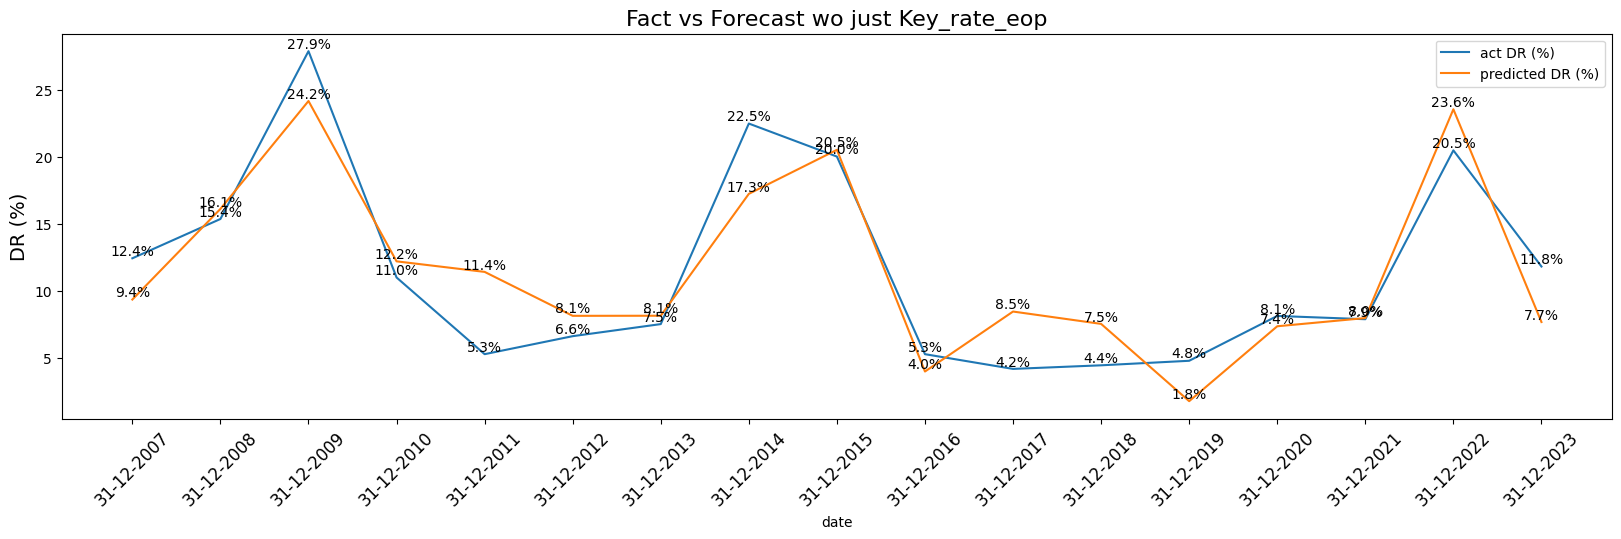

In [123]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_Key_rate_eop * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_Key_rate_eop * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_Key_rate_eop[i] * 100, '{:.1f}%'.format(Y_wo_Key_rate_eop[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_Key_rate_eop[i] * 100, '{:.1f}%'.format(Y_PRED_wo_Key_rate_eop[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just Key_rate_eop', fontsize=16)

plt.legend()

plt.show()

In [124]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_Key_rate_eop.score(X_arrey_wo_Key_rate_eop, Y_PRED_wo_Key_rate_eop),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_Key_rate_eop))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_Key_rate_eop))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_Key_rate_eop)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.02505406525031785
Mean Squared Error: 0.0009397648407203155
Root Mean Squared Error: 0.030655584168635827


In [125]:
# Forecast
X_new_base_wo_Key_rate_eop = X_new_base.drop(columns=['Key_rate_eop'])
X_new_base_wo_Key_rate_eop

Y_PRED_NEW_wo_Key_rate_eop = LinReg_wo_Key_rate_eop.predict(X_new_base_wo_Key_rate_eop)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_Key_rate_eop)

predicted new values of DR in base scenario : [ 0.02452302 -0.0004619   0.0233889 ]


In [ ]:
# wo EUR_UAH_eop

In [126]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_EUR_UAH_eop = data.iloc[:, :9].drop(columns=['EUR_UAH_eop'])


In [127]:
Y_wo_EUR_UAH_eop = np.array(data.DR)
LinReg_wo_EUR_UAH_eop= LinearRegression()
LinReg_wo_EUR_UAH_eop.fit(X_arrey_wo_EUR_UAH_eop, Y_wo_EUR_UAH_eop)

LinearRegression()

In [128]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [130]:
Y_PRED_wo_EUR_UAH_eop = LinReg_wo_EUR_UAH_eop.predict(X_arrey_wo_EUR_UAH_eop)
print("predicted values according to model:",  Y_PRED_wo_EUR_UAH_eop)

predicted values according to model: [0.09366808 0.15639238 0.24715156 0.12450331 0.11731206 0.07918088
 0.07809733 0.16849172 0.20711337 0.0639043  0.07053661 0.05688269
 0.00851183 0.08190645 0.09638111 0.23205889 0.07486039]


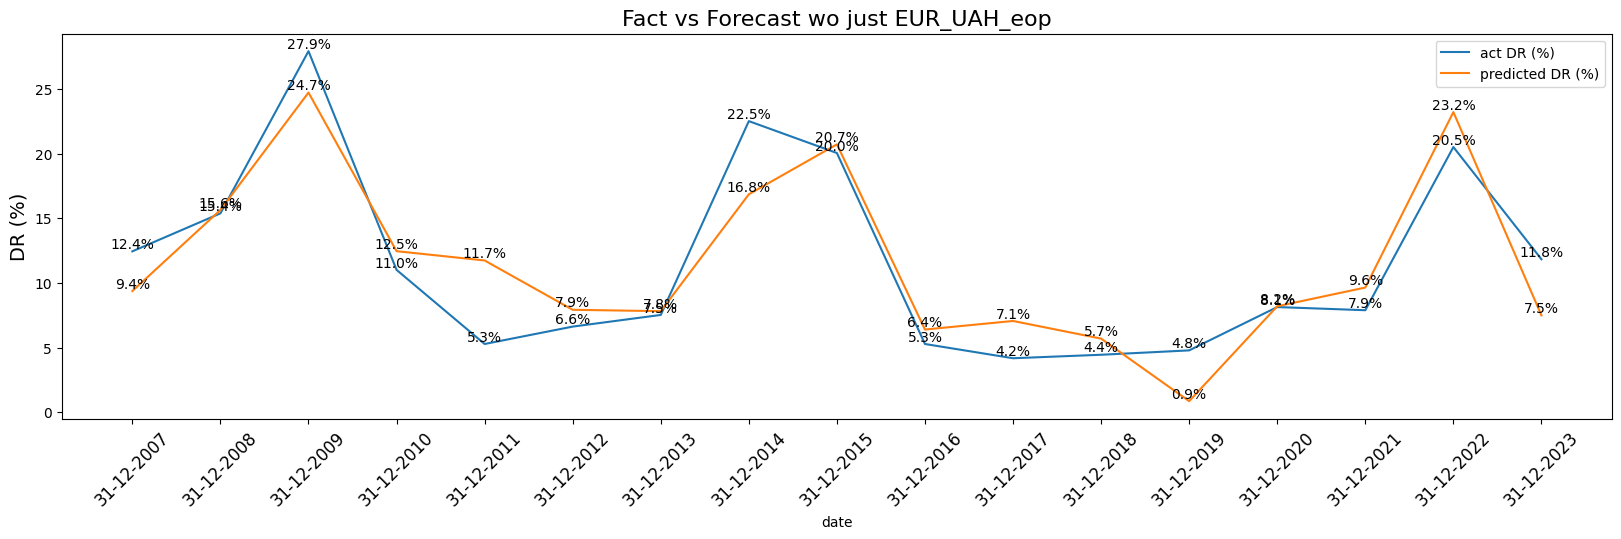

In [131]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_EUR_UAH_eop * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_EUR_UAH_eop * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_EUR_UAH_eop[i] * 100, '{:.1f}%'.format(Y_wo_EUR_UAH_eop[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_EUR_UAH_eop[i] * 100, '{:.1f}%'.format(Y_PRED_wo_EUR_UAH_eop[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just EUR_UAH_eop', fontsize=16)

plt.legend()

plt.show()

In [132]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_EUR_UAH_eop.score(X_arrey_wo_EUR_UAH_eop, Y_PRED_wo_EUR_UAH_eop),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_EUR_UAH_eop))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_EUR_UAH_eop))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_EUR_UAH_eop)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.02376041095963713
Mean Squared Error: 0.0009031641648696274
Root Mean Squared Error: 0.030052689810890928


In [133]:
# Forecast
X_new_base_wo_EUR_UAH_eop= X_new_base.drop(columns=['EUR_UAH_eop'])
X_new_base_wo_EUR_UAH_eop

Y_PRED_NEW_wo_EUR_UAH_eop = LinReg_wo_EUR_UAH_eop.predict(X_new_base_wo_EUR_UAH_eop)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_EUR_UAH_eop)

predicted new values of DR in base scenario : [0.02213767 0.01870663 0.04960553]


In [ ]:
# USD_UAH_eop

In [134]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_USD_UAH_eop = data.iloc[:, :9].drop(columns=['USD_UAH_eop'])

In [135]:
Y_wo_USD_UAH_eop = np.array(data.DR)
LinReg_wo_USD_UAH_eop= LinearRegression()
LinReg_wo_USD_UAH_eop.fit(X_arrey_wo_USD_UAH_eop, Y_wo_USD_UAH_eop)

LinearRegression()

In [136]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [137]:
Y_PRED_wo_USD_UAH_eop = LinReg_wo_USD_UAH_eop.predict(X_arrey_wo_USD_UAH_eop)
print("predicted values according to model:",  Y_PRED_wo_USD_UAH_eop)

predicted values according to model: [0.09366514 0.1594952  0.24429364 0.12337442 0.11553454 0.07896399
 0.07837898 0.1718847  0.20624792 0.06300323 0.07402269 0.05667939
 0.00513789 0.08557127 0.09366353 0.23188055 0.07515589]


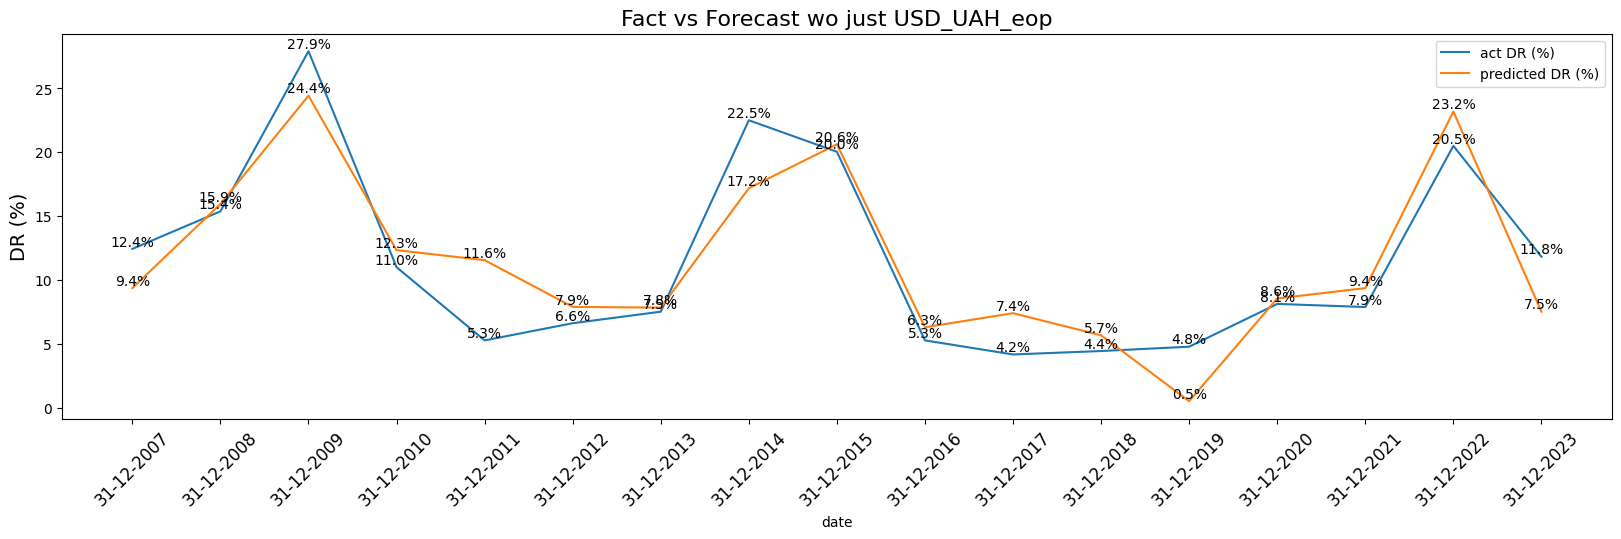

In [138]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_USD_UAH_eop * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_USD_UAH_eop * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_USD_UAH_eop[i] * 100, '{:.1f}%'.format(Y_wo_USD_UAH_eop[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_USD_UAH_eop[i] * 100, '{:.1f}%'.format(Y_PRED_wo_USD_UAH_eop[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just USD_UAH_eop', fontsize=16)

plt.legend()

plt.show()

In [139]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_USD_UAH_eop.score(X_arrey_wo_USD_UAH_eop, Y_PRED_wo_USD_UAH_eop),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_USD_UAH_eop))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_USD_UAH_eop))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_USD_UAH_eop)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.024059978835512547
Mean Squared Error: 0.0008991855141801775
Root Mean Squared Error: 0.029986422163708986


In [140]:
# Forecast
X_new_base_wo_USD_UAH_eop= X_new_base.drop(columns=['USD_UAH_eop'])
X_new_base_wo_USD_UAH_eop

Y_PRED_NEW_wo_USD_UAH_eop = LinReg_wo_USD_UAH_eop.predict(X_new_base_wo_USD_UAH_eop)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_USD_UAH_eop)

predicted new values of DR in base scenario : [0.02624414 0.02038779 0.05069109]


In [ ]:
# wo Date

In [141]:
data = pd.read_csv(url, sep=';')
X_arrey_wo_Date = data.iloc[:, :9].drop(columns=['Date'])

In [142]:
Y_wo_Date = np.array(data.DR)
LinReg_wo_Date= LinearRegression()
LinReg_wo_Date.fit(X_arrey_wo_Date, Y_wo_Date)

LinearRegression()

In [143]:
def int_to_date(data):
    date_str = str(data)
    date = datetime.strptime(date_str, '%Y%m%d')
    return date.strftime('%d-%m-%Y')

data['hist_dat'] = data['Date'].apply(lambda x: int_to_date(x))

formatted_column = data.pop('hist_dat')
data.insert(0, 'hist_dat', formatted_column)

In [144]:
Y_PRED_wo_Date = LinReg_wo_Date.predict(X_arrey_wo_Date)
print("predicted values according to model:",  Y_PRED_wo_Date)

predicted values according to model: [0.08868821 0.16084419 0.23779934 0.12207175 0.11628157 0.08277965
 0.08684777 0.17207196 0.21334907 0.04202386 0.0738206  0.05465037
 0.01399109 0.0858179  0.09521153 0.23143657 0.07926752]


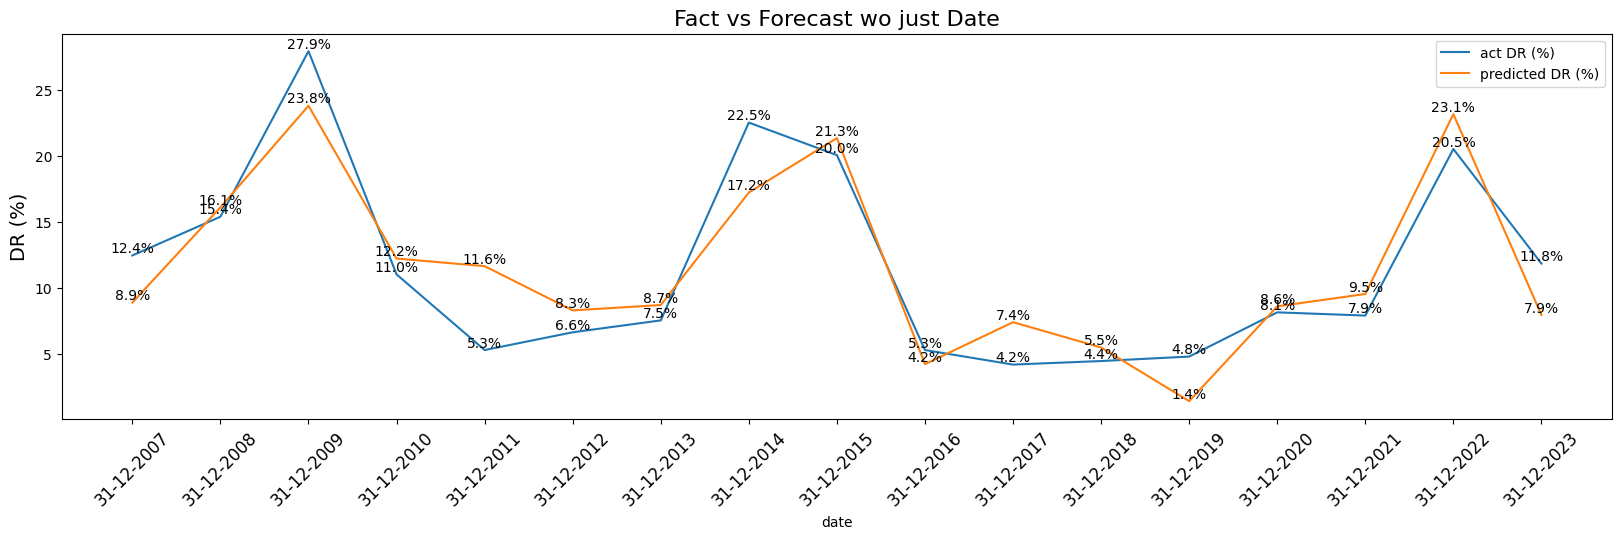

In [145]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data['hist_dat'], Y_wo_Date * 100, label="act DR (%)")
plt.plot(data['hist_dat'], Y_PRED_wo_Date * 100, label="predicted DR (%)")

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_wo_Date[i] * 100, '{:.1f}%'.format(Y_wo_Date[i] * 100), ha='center', va='bottom')

for i in range(len(data['hist_dat'])):
    plt.text(data['hist_dat'][i], Y_PRED_wo_Date[i] * 100, '{:.1f}%'.format(Y_PRED_wo_Date[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast wo just Date', fontsize=16)

plt.legend()

plt.show()

In [147]:
print('Coefficient of determination/ Level of confidance:', round(LinReg_wo_Date.score(X_arrey_wo_Date, Y_PRED_wo_Date),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_PRED_wo_Date))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_PRED_wo_Date))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_PRED_wo_Date)))

Coefficient of determination/ Level of confidance: 1.0
Mean Absolute Error: 0.025120927509967705
Mean Squared Error: 0.000912027880065513
Root Mean Squared Error: 0.030199799338166355


In [148]:
# Forecast
X_new_base_wo_Date= X_new_base.drop(columns=['Date'])
X_new_base_wo_Date

Y_PRED_NEW_wo_Date = LinReg_wo_Date.predict(X_new_base_wo_Date)
print("predicted new values of DR in base scenario :",  Y_PRED_NEW_wo_Date)

predicted new values of DR in base scenario : [0.02489839 0.0089238  0.03511027]
